In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

In [18]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [17]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [19]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [20]:
type(df['job_skills'][2])

list

In [21]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [22]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [23]:
df_DA_US = df_DA_US.explode('job_skills')

In [30]:
stat_skills = df_DA_US.groupby('job_skills').agg(
    count_skills = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

In [29]:
stat_skills = stat_skills.sort_values(by = 'count_skills', ascending=False)

In [31]:
df_DA_top_pay = stat_skills.sort_values(by = 'median_salary', ascending=False).head(10)

In [32]:
df_DA_top_pay

,count_skills,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [35]:
df_DA_top_skill = stat_skills.sort_values(by = 'count_skills', ascending=False).head(10).sort_values(by = 'median_salary', ascending=False).head(10)

In [36]:
df_DA_top_skill

,count_skills,median_salary
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


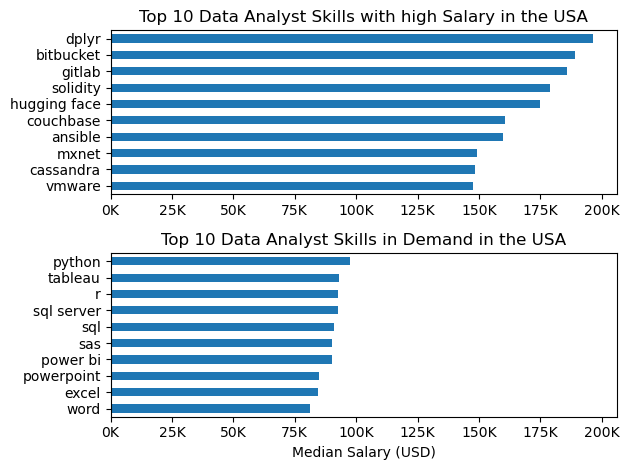

In [55]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind = 'barh', y = 'median_salary', ax = ax[0], legend =False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Data Analyst Skills with high Salary in the USA')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

df_DA_top_skill.plot(kind = 'barh', y = 'median_salary', ax = ax[1], legend =False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Data Analyst Skills in Demand in the USA')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.tight_layout()
